**Name:** SHUYUE JIA

**EID:** 56846018

# CS5489 - Tutorial 2
## Text Document Classification with Naive Bayes

In this tutorial you will classify text documents using Naive Bayes classifers.  We will be working with the dataset called "20 Newsgroups", which is a collection of 20,000 newsgroup posts organized into 20 categories.

First we need to initialize Python.  Run the below cell.

In [1]:
%matplotlib inline
import IPython.core.display         
IPython.core.display.set_matplotlib_formats("svg")
import matplotlib.pyplot as plt
import matplotlib
from numpy import *
from sklearn import *
from scipy import stats, special
random.seed(100)


Next, put the file "20news-bydate_py3.pkz' into the same directory as this ipynb file. **Do not unzip the file.**

Next, we will extract 4 classes from the dataset.  Run the below cell.

In [2]:
# strip away headers/footers/quotes from the text
removeset = ('headers', 'footers', 'quotes')

# only use 4 categories
cats = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']

# load the training and testing sets
newsgroups_train = datasets.fetch_20newsgroups(subset='train', remove=removeset, categories=cats, data_home='./')
newsgroups_test  = datasets.fetch_20newsgroups(subset='test', remove=removeset, categories=cats, data_home='./')


Now, we check if we got all the data.  The training set should have 2034 documents, and the test set should have 1353 documents.

In [3]:
print("training set size:", len(newsgroups_train.data))
print("testing set size: ", len(newsgroups_test.data))
print(newsgroups_train.target_names)


training set size: 2034
testing set size:  1353
['alt.atheism', 'comp.graphics', 'sci.space', 'talk.religion.misc']


Count the number examples in each class.  `newsgroups_train.target` is an array of class values (0 through 3), and `newsgroups_train.target[i]` is the class of the i-th document.

In [4]:
print("class counts")
for i in [0, 1, 2, 3]:
    print("{:20s}: {}".format(newsgroups_train.target_names[i], sum(newsgroups_train.target == i)))
    

class counts
alt.atheism         : 480
comp.graphics       : 584
sci.space           : 593
talk.religion.misc  : 377


Now have a look at the documents.  `newsgroups_train.data` is a list of strings, and `newsgroups_train.data[i]` is the i-th document.

In [5]:
for i in [0, 1, 2 ,3]:
    print("--- document {} (class={}) ---".format(i, newsgroups_train.target_names[newsgroups_train.target[i]]))
    print(newsgroups_train.data[i])
    

--- document 0 (class=comp.graphics) ---
Hi,

I've noticed that if you only save a model (with all your mapping planes
positioned carefully) to a .3DS file that when you reload it after restarting
3DS, they are given a default position and orientation.  But if you save
to a .PRJ file their positions/orientation are preserved.  Does anyone
know why this information is not stored in the .3DS file?  Nothing is
explicitly said in the manual about saving texture rules in the .PRJ file. 
I'd like to be able to read the texture rule information, does anyone have 
the format for the .PRJ file?

Is the .CEL file format available from somewhere?

Rych
--- document 1 (class=talk.religion.misc) ---


Seems to be, barring evidence to the contrary, that Koresh was simply
another deranged fanatic who thought it neccessary to take a whole bunch of
folks with him, children and all, to satisfy his delusional mania. Jim
Jones, circa 1993.


Nope - fruitcakes like Koresh have been demonstrating such evil 

**Tip:** while you do the tutorial, it is okay to make additional code cells in the file.  This will allow you to avoid re-running code (like training a classifier, then testing a classifier).

### 1. Build document vectors
Create the vocabulary from the training data.  Then build the document vectors for the training and testing sets.  You can decide how many words you want in the vocabulary.

In [6]:
# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target

testdata = newsgroups_test.data
testY  = newsgroups_test.target


In [7]:
# setup the document vectorizer to make BoW 
# - use english stop words 
# - max_features: only use the most frequent words in the dataset 
# (remove this to use all words in documents)
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=None)

# create the vocabulary - NOTE: we only use the training data! 
cntvect.fit(traindata)

# calculate the vectors for the training data 
trainX = cntvect.transform(traindata)

# calculate vectors for the test data 
testX = cntvect.transform(testdata)

# print the vocabulary - (key,value) pairs correspond to (word,vector index) 
# print(cntvect.vocabulary_)
print(len(cntvect.vocabulary_))
# print(shape(trainX))

print(trainY[:20])

26576
[1 3 2 0 2 0 2 1 2 1 2 1 1 2 1 2 0 2 2 3]


### 2. Bernoulli Naive Bayes 
Learn a Bernoulli Naive Bayes model from the training set.  What is the prediction accuracy on the test set?  Try different parameters (alpha, max_features, etc) to get the best performance.

In [8]:
# fit the NB Bernoulli model.
# the model automatically converts count vector into binary vector 
bmodel = naive_bayes.BernoulliNB(alpha=0.4) 
bmodel.fit(trainX, trainY)

# prediction 
predY = bmodel.predict(testX) 
print("predictions: ", predY) 
print("actual: ", testY)

# calculate accuracy 
acc = metrics.accuracy_score(testY, predY) 
print('The predicted accuracy is ', acc)


predictions:  [1 1 1 ... 1 1 1]
actual:  [2 1 1 ... 3 1 1]
The predicted accuracy is  0.6504065040650406


What are the most informative words for each category?  Run the below code.

Note: `model.coef_[i]` will index the scores for the i-th class

In [9]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(bmodel.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("{:9s} ({:.5f})".format(fnames[t], bmodel.coef_[i][t]))
        

class alt.atheism
time      (-1.80095)
know      (-1.60695)
does      (-1.60695)
god       (-1.58641)
like      (-1.54656)
say       (-1.52722)
just      (-1.45339)
think     (-1.39297)
people    (-1.29721)
don       (-1.18911)
class comp.graphics
just      (-1.94762)
don       (-1.91228)
program   (-1.87815)
need      (-1.85602)
does      (-1.74238)
use       (-1.73266)
like      (-1.60568)
know      (-1.50836)
graphics  (-1.49302)
thanks    (-1.47045)
class sci.space
earth     (-1.90467)
use       (-1.88230)
time      (-1.76747)
know      (-1.72878)
think     (-1.72878)
nasa      (-1.72878)
don       (-1.69153)
just      (-1.47095)
like      (-1.41396)
space     (-1.01870)
class talk.religion.misc
say       (-1.65216)
way       (-1.62491)
like      (-1.61156)
does      (-1.53499)
know      (-1.48702)
think     (-1.41912)
god       (-1.37629)
don       (-1.35554)
just      (-1.34532)
people    (-1.31529)


### 3. Multinomial Naive Bayes model
Now learn a multinomial Naive Bayes model using the TF-IDF representation for the documents.  Again try different parameter values to improve the test accuracy.

In [10]:
# setup the document vectorizer to make BoW 
# - use english stop words 
# - max_features: only use the most frequent words in the dataset 
# (remove this to use all words in documents)
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=1000)

# create the vocabulary - NOTE: we only use the training data! 
cntvect.fit(traindata)

# calculate the vectors for the training data 
trainX = cntvect.transform(traindata)

# calculate vectors for the test data 
testX = cntvect.transform(testdata)

# TF-IDF representation 
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1') 

# setup the TF-IDF representation, and transform the training set 
trainXtf = tf_trans.fit_transform(trainX) 

# transform the test set 
testXtf = tf_trans.transform(testX) 

# fit a multinomial model (with smoothing) 
mmodel_tf = naive_bayes.MultinomialNB(alpha=1e-4) 
mmodel_tf.fit(trainXtf, trainY)

# prediction 
predY = mmodel_tf.predict(testXtf) 
print("prediction: ", predY) 
print("actual: ", testY)

# calculate accuracy 
acc = metrics.accuracy_score(testY, predY) 
print('The predicted accuracy is ', acc)


prediction:  [2 1 1 ... 2 1 1]
actual:  [2 1 1 ... 3 1 1]
The predicted accuracy is  0.7102734663710274


What are the most informative features for Multinomial model? Run the below code.

In [11]:
# get the word names
fnames = asarray(cntvect.get_feature_names())
for i,c in enumerate(newsgroups_train.target_names):
    tmp = argsort(mmodel_tf.coef_[i])[-10:]
    print("class", c)
    for t in tmp:
        print("{:9s} ({:.5f})".format(fnames[t], mmodel_tf.coef_[i][t]))
        

class alt.atheism
atheism   (-5.13799)
know      (-5.02532)
say       (-4.92848)
religion  (-4.91205)
does      (-4.75266)
think     (-4.70780)
people    (-4.63912)
just      (-4.56487)
don       (-4.56021)
god       (-4.38828)
class comp.graphics
program   (-4.96348)
hi        (-4.92756)
looking   (-4.89098)
does      (-4.84864)
image     (-4.75633)
know      (-4.73721)
files     (-4.71849)
file      (-4.68328)
thanks    (-4.35243)
graphics  (-4.31904)
class sci.space
moon      (-5.23968)
good      (-5.22634)
launch    (-5.19466)
think     (-5.17341)
orbit     (-5.09927)
thanks    (-4.95935)
nasa      (-4.89540)
just      (-4.80543)
like      (-4.79549)
space     (-4.00060)
class talk.religion.misc
know      (-5.10966)
think     (-5.09268)
just      (-5.01810)
way       (-5.01084)
don       (-4.97452)
christian (-4.88551)
people    (-4.87289)
christians (-4.81358)
jesus     (-4.64933)
god       (-4.22938)


How do the most informative words differ between the TF-IDF multinomial model and the Bernoulli model?

- Conclusion:
    The **common words** are *less informative* based on the TF-IDF Multinomial model
    where they are *more informative* regarding the Bernoulli model.
    

- Reasons:

1. For the Bernoulli model：
    Only model the word (single feature) occur (presence) or doesn't occur (absence).
    
    ->  didn't consider the relationships between different words (features)
        which leading to that, more *common words* appear in the the most informative words list

2. For the TF-IDF multinomial model:
    (1) multinomial model: 
        model the multiple words (multiple features) occur.
        -> more generalize 
    
    (2) Use TF-IDF to eliminate the effect of common words
        -> common words are less informative
        

Finally, look at a few of the misclassified documents. 

In [12]:
# show examples of misclassified
inds = where(predY != testY)
print(inds)
for i in inds[0]:
    print(i, 'index', "---- true={}, pred={}".format(testY[i], predY[i]))
    print(newsgroups_test.data[i], '\n')
    

(array([  15,   17,   22,   23,   24,   26,   30,   34,   39,   40,   42,
         47,   52,   61,   67,   76,   77,   78,   82,   87,   89,   90,
         93,   95,   97,   98,  101,  105,  106,  107,  110,  117,  119,
        123,  124,  126,  127,  131,  134,  136,  140,  141,  144,  145,
        148,  149,  150,  152,  154,  155,  160,  161,  166,  167,  169,
        171,  172,  173,  176,  177,  179,  181,  184,  185,  190,  194,
        196,  197,  198,  201,  207,  209,  215,  220,  221,  223,  226,
        227,  236,  245,  246,  247,  257,  258,  264,  267,  269,  277,
        283,  285,  286,  287,  288,  291,  293,  295,  306,  307,  308,
        311,  312,  321,  330,  331,  334,  337,  341,  346,  350,  351,
        355,  357,  362,  367,  368,  371,  373,  374,  384,  387,  388,
        389,  398,  399,  402,  403,  407,  413,  419,  421,  425,  431,
        435,  439,  444,  447,  448,  450,  453,  455,  457,  460,  462,
        463,  470,  471,  472,  473,  484,  487,  

879 index ---- true=0, pred=2
Darwin fish can be bought from:
--
"JOIN THE DARWINNERS (TM) Send $6 to receive your official Evolving
Fish..  wherever you want to spread the good news!  Darwinners, 6671
Sunset Blvd., Ste. 1525, L.A.,CA 90028 THE GREATEST THEORY EVER TOLD!"

Jenny 

881 index ---- true=0, pred=2
: >Prove it. I have a source that says that to date, the civilian death count
: >(er, excuse me, I mean "collateral damage") is about 200,000.
: 
: I have _never_ seen any source that was claiming such a figure.  Please
: post the source so its reliability can be judged.  

This figure would not simply be deaths by bombing, but also death later
from disease (the sewer system of Baghdad was deliberately targeted) and
starvation. I believe (but when I get a copy of the latest research in
June or July) that this was the figure proposed in the Census Bureau 
report on the matter. The report was suppressed and the CB attempted to
sack the author of the report, but failed due to proced

Can you get any intuition or reason why they were misclassified?

1. Similar contents between different documents' subject, which leads to overlap probabilities and may classify in a wrong way
2. Less training data
3. The punctuations, numbers, etc. may have side effects to the overall performance.


### 4. Effect of smoothing
The smoothing (regularization) parameter has a big effect on the performance.  Using the Multinomial TF-IDF models, make a plot of accuracy versus different values of alpha. For each alpha, you need to train a new model. Which alpha value yields the best result?

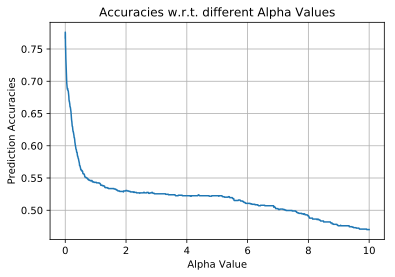

In [13]:
# setup the document vectorizer to make BoW 
# - use english stop words 
# - max_features: only use the most frequent words in the dataset 
# (remove this to use all words in documents)
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=None)

# create the vocabulary - NOTE: we only use the training data! 
cntvect.fit(traindata)

# calculate the vectors for the training data 
trainX = cntvect.transform(traindata)

# calculate vectors for the test data 
testX = cntvect.transform(testdata)

# TF-IDF representation 
tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1') 

# setup the TF-IDF representation, and transform the training set 
trainXtf = tf_trans.fit_transform(trainX) 

# transform the test set 
testXtf = tf_trans.transform(testX) 

alphas = []
accuracies = []

for alpha in arange(1e-7, 10, 1e-3):
    
    # fit a multinomial model (with smoothing) 
    mmodel_tf = naive_bayes.MultinomialNB(alpha=alpha) 
    mmodel_tf.fit(trainXtf, trainY)

    # prediction 
    predY = mmodel_tf.predict(testXtf) 

    # calculate accuracy 
    acc = metrics.accuracy_score(testY, predY)
    
    alphas.append(alpha) 
    accuracies.append(acc)

plt.plot(alphas, accuracies)
plt.grid(True)
plt.ylabel('Prediction Accuracies')
plt.xlabel('Alpha Value')
plt.title('Accuracies w.r.t. different Alpha Values')
plt.show()


### 5. Effect of vocabulary size
The vocabulary size also affects the accuracy.  Make another plot of accuracy versus vocabulary size.  Which vocabulary size yields the best result?

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/shuyuej/anaconda3/envs/tensorflow/lib/python3.5/site-packages/sklearn/naive_bayes.py:485: UserWarning: alpha too 

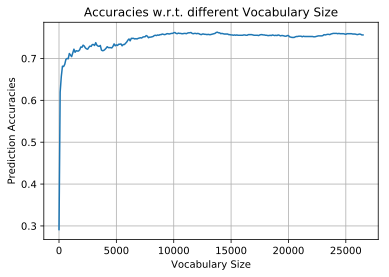

In [14]:
voc_sizes = []
accuracies = []

for voc_size in arange(1, len(cntvect.vocabulary_), 100):
    # setup the document vectorizer to make BoW 
    # - use english stop words 
    # - max_features: only use the most frequent words in the dataset (remove this to use all words in documents)
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=voc_size)
    voc_sizes.append(voc_size)
    
    # create the vocabulary 
    # NOTE: we only use the training data! 
    cntvect.fit(traindata)

    # calculate the vectors for the training data 
    trainX = cntvect.transform(traindata)
    
    # calculate vectors for the test data 
    testX = cntvect.transform(testdata)

    # TF-IDF representation 
    # (For TF, pass use_idf=False) 
    tf_trans = feature_extraction.text.TfidfTransformer(use_idf=True, norm='l1') 

    # setup the TF-IDF representation, and transform the training set 
    trainXtf = tf_trans.fit_transform(trainX) 

    # transform the test set 
    testXtf = tf_trans.transform(testX) 

    # fit a multinomial model (with smoothing) 
    mmodel_tf = naive_bayes.MultinomialNB(alpha=0.0) 
    mmodel_tf.fit(trainXtf, trainY)

    # prediction 
    predY = mmodel_tf.predict(testXtf) 
    # print("prediction: ", predY) 
    # print("actual: ", testY)

    # calculate accuracy 
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)

plt.plot(voc_sizes, accuracies)
plt.grid(True)
plt.ylabel('Prediction Accuracies')
plt.xlabel('Vocabulary Size')
plt.title('Accuracies w.r.t. different Vocabulary Size')
plt.show()


## 6. Poisson Naive Bayes

Now we will implement a Naive Bayes classifier using a Poisson distribution to model the count of each word appearing in the document.  Recall that the Poisson distribution is:
$$ \mathrm{Poisson}(x,\mu) = \frac{1}{x!}e^{-\mu} \mu^x$$
where $x \in \{0,1,2,\cdots\}$ is a counting number, and $\mu$ is the Poisson mean (arrival rate).

Here is some code showing how to compute the Poisson distribution using scipy.

[[ -1.          -2.          -3.5       ]
 [ -1.          -1.30685282  -2.24723703]
 [ -1.69314718  -1.30685282  -1.68762124]
 [ -2.79175947  -1.71231793  -1.53347056]
 [ -4.17805383  -2.40546511  -1.66700196]
 [ -5.78749174  -3.32175584  -2.0236769 ]
 [ -7.57925121  -4.42036813  -2.5626734 ]
 [ -9.52516136  -5.6731311   -3.25582058]
 [-11.6046029   -7.05942546  -4.08249915]
 [-13.80182748  -8.56350286  -5.02696076]
 [-16.10441257 -10.17294077  -6.07678289]
 [-18.50230785 -11.87768886  -7.22191519]
 [-20.9872145  -13.66944833  -8.45405887]
 [-23.55216385 -15.54125051  -9.76624526]
 [-26.19122118 -17.48716065 -11.15253962]
 [-28.89927138 -19.50206368 -12.60782686]
 [-31.67186011 -21.58150522 -14.12765261]
 [-34.50507345 -23.72157138 -15.70810299]
 [-37.39544521 -25.91879596 -17.34571178]
 [-40.33988419 -28.17008776 -19.03738779]]


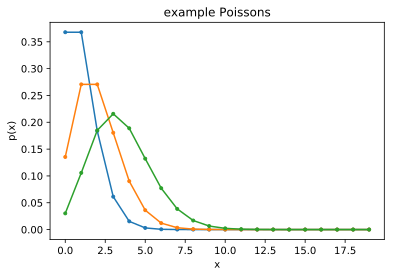

In [15]:
# Poisson distribution
from scipy.stats import poisson

# compute log Poisson(x, lambda)
px = poisson.logpmf(arange(0,20).reshape((20,1)), mu=[[1., 2., 3.5]])

# NOTE: the function respects broadcasting
# x is a column vector, and mu is a row vector
# in the output px, each column is the log Poisson values for one mu
print(px)

# make a plot
plt.title('example Poissons')
plt.plot(arange(0,20), exp(px), '.-');
plt.xlabel('x')
plt.ylabel('p(x)')
plt.show()


Now let's see how to use the Poisson to create a Naive Bayes model. Let $x_i$ be the number of times the i-th word appears in the document. Then we model $x_i$ as a Poisson distribution for each class $c$,
  $$p(x_i|y=c) = \mathrm{Poisson}(x_i, \mu_{i,c})$$
where $\mu_{i, c}$ is the Poisson parameter for the i-th word in the c-th class.  Given the data $\{x_i^{(1)}, \cdots x_i^{(N)}\}$, corresponding the counts of the i-th word in the documents in the c-th class, $\mu_{i,c}$ is estimated as the mean of the data: $\mu_{i,c} = \frac{1}{N} \sum_{n=1}^N x_i^{(n)}$.

Finally, given the document $\mathbf{x} = [x_1,\cdots,x_D]$, the document class-conditional likelihood is:
  $$ p(\mathbf{x}|y=c) = \prod_{i=1}^D p(x_i|y=c) = \prod_{i=1}^D \mathrm{Poisson}(x_i, \mu_{i,c})$$
or CCD log-likelihood is
  $$ \log p(\mathbf{x}|y=c) = \sum_{i=1}^D \log \mathrm{Poisson}(x_i, \mu_{i,c})$$

Write a class for the Poisson Naive Bayes model.  Starting with the `GaussBayes` class from lecture as the template, you only need to change the estimation of the parameters $\mu_{i,c}$ and the computation of the log CCD.

In [16]:
# Poisson functions
from scipy.special import logsumexp
from scipy.stats import poisson
from scipy.special import gammaln
from scipy.stats import multivariate_normal as mvn

class PoissonBayes:
    # constructor: 
    def __init__(self):
        pass
        
    # Fit the model: assumes classes are [0,1,2,...K-1]
    # K is the max value in y
    def fit(self, X, y):
        # get the number of classes
        K = max(y) + 1
        self.K = K
        
        # estimate mean and covariance
        self.mu = []
        for c in range(K):
            Xc = X[y==c]  # select samples for this class
            # print('y==c', y==c, len(y==c))
            # print('Xc', Xc, shape(Xc))
            self.mu.append(mean(Xc, axis=0))  # estimate the mean

        # estimate class priors
        tmp = []
        for c in range(K):
            tmp.append(count_nonzero(y == c)) # number of Class c
        
        self.pi = array(tmp) / len(y)  # divide by the total
    
    # compute the log CCD for class c, log p(x|y=c)
    def compute_logccd(self, X, c):        
        lx = sum(poisson.logpmf(k=X, mu=self.mu[c]), axis=1)
        
        return lx
    
    # compute the joint log-likelihood: log p(x,y)
    def compute_logjoint(self, X):
        # compute log joint likelihood: log p(x|y) + log p(y)
        jl = []
        for c in range(self.K):
            jl.append(self.compute_logccd(X, c) + log(self.pi[c]))
        
        # p[i,c] = log p(X[i]|y=c)
        p = stack(jl, axis=-1)
        
        return p
        
    # compute the posterior log-probability of each class given X
    def predict_logproba(self, X):        
        lp = self.compute_logjoint(X)  # compute joint loglikelihoods
        lpx = logsumexp(lp, axis=1)    # compute log p(x) = log sum_c exp( log p(x,y))
        
        return lp - lpx[:, newaxis]     # compute log posterior: log p(y|x) = log p(x,y) - log p(x)
    
    # compute the posterior probability of each class given X
    def predict_proba(self, X):
        
        return exp(self.predict_logproba(X))
    
    # compute the most likely class given X
    def predict(self, X):
        lp = self.compute_logjoint(X)   # compute joint likelihoods
        c = argmax(lp, axis=1)    # find the maximum
        
        return c                        # return the class label


Now test your Poisson NB model on the Newsgroup dataset.

In [17]:
cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=2000)

# create the vocabulary 
cntvect.fit(traindata)

# calculate the vectors for the training data 
trainX = cntvect.transform(traindata)
trainX = trainX.todense()

# calculate vectors for the test data 
testX = cntvect.transform(testdata)
testX = testX.todense()

pb = PoissonBayes()
pb.fit(trainX, trainY)
print(testY)
print(pb.mu)
print(shape(pb.mu))

# prediction 
predY = pb.predict(testX)
print("prediction: ", predY) 
print("actual: ", testY)

# calculate accuracy 
acc = metrics.accuracy_score(testY, predY)
print('The predicted accuracy is ', acc)


[2 1 1 ... 3 1 1]
[matrix([[0.        , 0.03541667, 0.        , ..., 0.00833333, 0.        ,
         0.        ]]), matrix([[0.04452055, 0.02054795, 0.0119863 , ..., 0.00684932, 0.07705479,
         0.        ]]), matrix([[0.0539629 , 0.15514334, 0.04047218, ..., 0.02192243, 0.00168634,
         0.        ]]), matrix([[0.00265252, 0.02387268, 0.        , ..., 0.00530504, 0.00265252,
         0.05570292]])]
(4, 1, 2000)
prediction:  [1 1 1 ... 0 1 1]
actual:  [2 1 1 ... 3 1 1]
The predicted accuracy is  0.6467110125646711


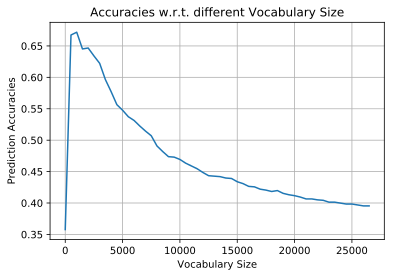

In [18]:
voc_sizes = []
accuracies = []

# pull out the document data and labels
traindata = newsgroups_train.data
trainY = newsgroups_train.target
testdata = newsgroups_test.data
testY  = newsgroups_test.target
temp = feature_extraction.text.CountVectorizer(stop_words='english', max_features=None)
temp.fit(traindata)

for voc_size in arange(1, len(temp.vocabulary_), 500):
    cntvect = feature_extraction.text.CountVectorizer(stop_words='english', max_features=voc_size)
    voc_sizes.append(voc_size)

    # create the vocabulary 
    cntvect.fit(traindata)

    # calculate the vectors for the training data 
    trainX = cntvect.transform(traindata)
    trainX = trainX.todense()

    # calculate vectors for the test data 
    testX = cntvect.transform(testdata)
    testX = testX.todense()
    # print(testX)

    pb = PoissonBayes()
    pb.fit(trainX, trainY)

    # prediction 
    predY = pb.predict(testX)
    # print(predY)

    # calculate accuracy 
    acc = metrics.accuracy_score(testY, predY)
    accuracies.append(acc)

plt.plot(voc_sizes, accuracies)
plt.grid(True)
plt.ylabel('Prediction Accuracies')
plt.xlabel('Vocabulary Size')
plt.title('Accuracies w.r.t. different Vocabulary Size')
plt.show()


How does the Poisson NB model compare with the other models that you tested?

- Advantage of parameter estimation: 
  Faster training and inference as there are less parameters to estimate, i.e., only one parameter mu for the Poisson model.

- The training process is more stable for data with sparse characteristics.

Is this a good model for documents?

- I think there are pros and cons. It might be better for documents since the word vectors of documents' words are typically sparse. However, the performance of this model might be unsatisfactory because of fewer number of parameters. Overall, the Poisson model might improve the model performance.
